# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---
# Obersevable Trends: 
* Latitude and Temperature are highly correlated, citites with latitude coordinates between -20 and 20 have the highest temperatures. 
* Latitude and Humidty plot shows no obvious correlations, however, it seems that cities near the equator line (lat coordinates 0-15) tend to have a higher humidity. More analysis is required. 
* Latitude and Cloudiness plot shows no correlation. 
* Wind Speed and Latitude plot shows no correlation. 
* My sample was evenly distibuted across the globe, however, I have a higher sample from above the equator. According to the Longitude and Latitude plot, North America, Europe, and Asia having the highest representations. 
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [13]:
# converting cities list to dateframe 
random_cities = pd.DataFrame(cities)
random_cities.columns = ["Cities"]
random_cities.head()

,Cities
0,jizan
1,feijo
2,yulara
3,sergeyevka
4,mataura


In [10]:
# taking sample to work with so I dont overload api
samplecity = random_cities.sample(5)
samplecity.head()

,Cities
204,eskasem
555,ballina
197,souillac
435,aklavik
101,hermanus


In [21]:
# Api url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
row_count = 0
# loop through cities 
for index, row in random_cities.iterrows(): 

    query_url = url + "appid=" + api_key + "&units=" + units + "&q="+ row['Cities']
    print("Finding cities...")
    print("Retrieving data for city #" + str(row_count))
    print("City #" + str(row_count) + " is " + str(random_cities["Cities"].values[row_count]))
    print(query_url)
    row_count += 1
# try statment to avoid loop crashing     
    try:
        
        weather_response = requests.get(query_url)
        cityweather = weather_response.json()
        random_cities.set_value(index, "longitude", int(cityweather['coord']['lon']))
        random_cities.set_value(index, "latitude", int(cityweather['coord']['lat']))
        random_cities.set_value(index, "temperature", int(cityweather['main']['temp']))
        random_cities.set_value(index, "humidity", int(cityweather['main']['humidity']))
        random_cities.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        random_cities.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
# if data isnt found, skip the city and print this statement         
    except:
        
        print("ERROR finding city data, skipping...")
       



Finding cities...
Retrieving data for city #0
City #0 is jizan
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=jizan
Finding cities...
Retrieving data for city #1
City #1 is feijo
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=feijo


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

Finding cities...
Retrieving data for city #2
City #2 is yulara
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=yulara
Finding cities...
Retrieving data for city #3
City #3 is sergeyevka
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=sergeyevka
Finding cities...
Retrieving data for city #4
City #4 is mataura
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=mataura
Finding cities...
Retrieving data for city #5
City #5 is albany
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=albany
Finding cities...
Retrieving data for city #6
City #6 is ola
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=ola
Finding cities...
Retrieving data for city #7
City #7 is upernavik
http://api.openweathermap.org/data/2.5/weather?appid=accafe

Finding cities...
Retrieving data for city #47
City #47 is avarua
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=avarua
Finding cities...
Retrieving data for city #48
City #48 is kalaleh
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=kalaleh
Finding cities...
Retrieving data for city #49
City #49 is atuona
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=atuona
Finding cities...
Retrieving data for city #50
City #50 is sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=sioux lookout
Finding cities...
Retrieving data for city #51
City #51 is bluff
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=bluff
Finding cities...
Retrieving data for city #52
City #52 is fortuna
http://api.openweathermap.org/data/2.5/

Finding cities...
Retrieving data for city #92
City #92 is muriwai beach
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=muriwai beach
Finding cities...
Retrieving data for city #93
City #93 is kegayli
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=kegayli
ERROR finding city data, skipping...
Finding cities...
Retrieving data for city #94
City #94 is east london
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=east london
Finding cities...
Retrieving data for city #95
City #95 is laguna
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=laguna
Finding cities...
Retrieving data for city #96
City #96 is mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=mar del plata
Finding cities...
Retrieving data for city 

Finding cities...
Retrieving data for city #136
City #136 is yangjiang
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=yangjiang
Finding cities...
Retrieving data for city #137
City #137 is kenora
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=kenora
Finding cities...
Retrieving data for city #138
City #138 is half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=half moon bay
Finding cities...
Retrieving data for city #139
City #139 is liverpool
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=liverpool
Finding cities...
Retrieving data for city #140
City #140 is coihaique
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=coihaique
Finding cities...
Retrieving data for city #141
City #141 is port hardy
http:/

Finding cities...
Retrieving data for city #182
City #182 is japura
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=japura
Finding cities...
Retrieving data for city #183
City #183 is vibo valentia
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=vibo valentia
Finding cities...
Retrieving data for city #184
City #184 is berlevag
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=berlevag
Finding cities...
Retrieving data for city #185
City #185 is beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=beringovskiy
Finding cities...
Retrieving data for city #186
City #186 is ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=ixtapa
Finding cities...
Retrieving data for city #187
City #187 is severo-kurilsk
http

Finding cities...
Retrieving data for city #226
City #226 is cao bang
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=cao bang
Finding cities...
Retrieving data for city #227
City #227 is eyl
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=eyl
Finding cities...
Retrieving data for city #228
City #228 is mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=mnogovershinnyy
Finding cities...
Retrieving data for city #229
City #229 is serenje
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=serenje
Finding cities...
Retrieving data for city #230
City #230 is ozark
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=ozark
Finding cities...
Retrieving data for city #231
City #231 is kirakira
http://api.openweatherma

Finding cities...
Retrieving data for city #272
City #272 is coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=coahuayana
Finding cities...
Retrieving data for city #273
City #273 is timizart
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=timizart
Finding cities...
Retrieving data for city #274
City #274 is lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=lavrentiya
Finding cities...
Retrieving data for city #275
City #275 is ayagoz
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=ayagoz
Finding cities...
Retrieving data for city #276
City #276 is orkney
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=orkney
Finding cities...
Retrieving data for city #277
City #277 is ayan
http://api.openweatherma

Finding cities...
Retrieving data for city #318
City #318 is taltal
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=taltal
Finding cities...
Retrieving data for city #319
City #319 is udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=udachnyy
Finding cities...
Retrieving data for city #320
City #320 is praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=praia da vitoria
Finding cities...
Retrieving data for city #321
City #321 is kushima
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=kushima
Finding cities...
Retrieving data for city #322
City #322 is moose factory
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=moose factory
Finding cities...
Retrieving data for city #323
City #323 is moranbah


Finding cities...
Retrieving data for city #362
City #362 is saint-georges
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=saint-georges
Finding cities...
Retrieving data for city #363
City #363 is fukue
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=fukue
Finding cities...
Retrieving data for city #364
City #364 is naze
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=naze
Finding cities...
Retrieving data for city #365
City #365 is shirgaon
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=shirgaon
ERROR finding city data, skipping...
Finding cities...
Retrieving data for city #366
City #366 is ayna
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=ayna
Finding cities...
Retrieving data for city #367
City #367 is clyd

Finding cities...
Retrieving data for city #406
City #406 is jinji
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=jinji
Finding cities...
Retrieving data for city #407
City #407 is verkhnyaya inta
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=verkhnyaya inta
Finding cities...
Retrieving data for city #408
City #408 is bhuj
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=bhuj
Finding cities...
Retrieving data for city #409
City #409 is cheney
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=cheney
Finding cities...
Retrieving data for city #410
City #410 is bandar-e lengeh
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=bandar-e lengeh
Finding cities...
Retrieving data for city #411
City #411 is tumannyy
http://api

Finding cities...
Retrieving data for city #450
City #450 is jonava
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=jonava
Finding cities...
Retrieving data for city #451
City #451 is gondanglegi
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=gondanglegi
Finding cities...
Retrieving data for city #452
City #452 is conde
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=conde
Finding cities...
Retrieving data for city #453
City #453 is mayo
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=mayo
Finding cities...
Retrieving data for city #454
City #454 is turkan
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=turkan
Finding cities...
Retrieving data for city #455
City #455 is saint-augustin
http://api.openweathermap.org/

Finding cities...
Retrieving data for city #495
City #495 is abha
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=abha
Finding cities...
Retrieving data for city #496
City #496 is honningsvag
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=honningsvag
Finding cities...
Retrieving data for city #497
City #497 is anloga
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=anloga
Finding cities...
Retrieving data for city #498
City #498 is rena
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=rena
Finding cities...
Retrieving data for city #499
City #499 is acari
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=acari
Finding cities...
Retrieving data for city #500
City #500 is cuauhtemoc
http://api.openweathermap.org/data/2.5

Finding cities...
Retrieving data for city #540
City #540 is marcona
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=marcona
ERROR finding city data, skipping...
Finding cities...
Retrieving data for city #541
City #541 is bennington
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=bennington
Finding cities...
Retrieving data for city #542
City #542 is kyabram
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=kyabram
Finding cities...
Retrieving data for city #543
City #543 is esperance
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=esperance
Finding cities...
Retrieving data for city #544
City #544 is srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=srednekolymsk
Finding cities...
Retrieving data for cit

Finding cities...
Retrieving data for city #584
City #584 is gardan diwal
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=gardan diwal
ERROR finding city data, skipping...
Finding cities...
Retrieving data for city #585
City #585 is necochea
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=necochea
Finding cities...
Retrieving data for city #586
City #586 is uruzgan
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=uruzgan
Finding cities...
Retrieving data for city #587
City #587 is kunda
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=kunda
Finding cities...
Retrieving data for city #588
City #588 is varberg
http://api.openweathermap.org/data/2.5/weather?appid=accafea3e20973ac585a55cc17b7c084&units=Imperial&q=varberg
Finding cities...
Retrieving data for city #589
City #5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
random_cities.to_csv("random_city_weather.csv")

In [37]:
random_cities.head()

,Cities,longitude,latitude,temperature,humidity,cloudiness,wind_speed
0,jizan,42.0,16.0,86.0,66.0,0.0,4.0
1,feijo,-79.0,-3.0,89.0,33.0,75.0,6.0
2,yulara,130.0,-25.0,68.0,77.0,40.0,9.0
3,sergeyevka,67.0,53.0,33.0,92.0,0.0,9.0
4,mataura,168.0,-46.0,44.0,67.0,92.0,20.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

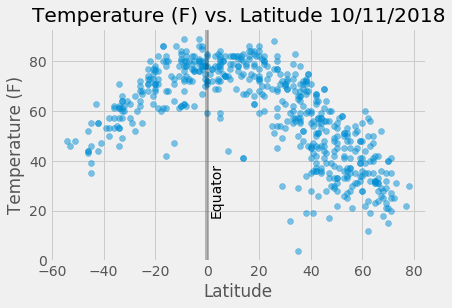

In [105]:
# Import
date = time.strftime("%m/%d/%Y")
plt.scatter(random_cities["latitude"],random_cities["temperature"], alpha = 0.5)
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.style.use('fivethirtyeight')
plt.savefig("Humidity_L.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

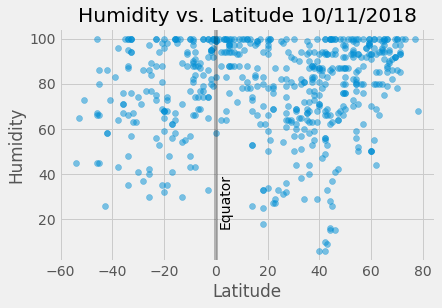

In [106]:
plt.scatter(random_cities["latitude"],random_cities["humidity"], alpha = 0.5)
plt.title(f"Humidity vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.style.use('fivethirtyeight')
plt.savefig("Humidity_L.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

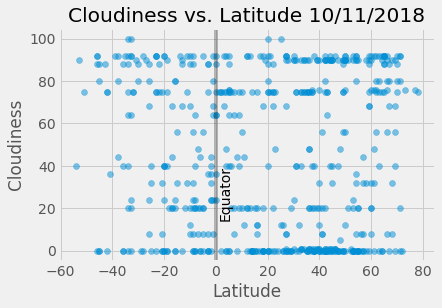

In [107]:
plt.scatter(random_cities["latitude"],random_cities["cloudiness"], alpha = 0.5)
plt.title(f"Cloudiness vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.style.use('fivethirtyeight')
plt.savefig("Cloudiness_L.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

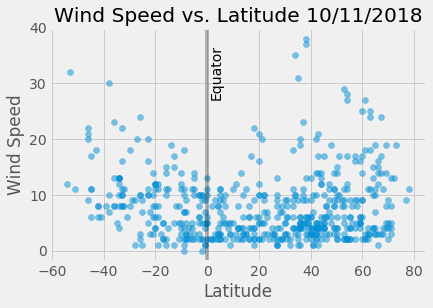

In [108]:
plt.scatter(random_cities["latitude"],random_cities["wind_speed"], alpha = 0.5)
plt.title(f"Wind Speed vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.style.use('fivethirtyeight')
plt.savefig("WindSpeed_L.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

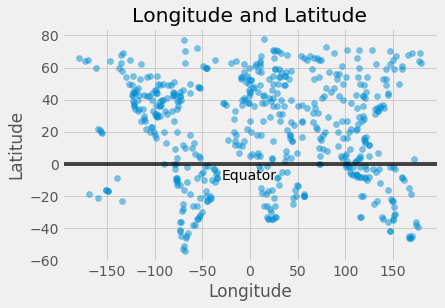

In [109]:
plt.scatter(random_cities["longitude"],random_cities["latitude"], alpha = 0.5)
plt.title("Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axhline(0, color = 'black', alpha = .7, label = 'Equator')
plt.text(-30,-10,'Equator', rotation=0)
plt.style.use('fivethirtyeight')
plt.savefig("LvL.png")
plt.show